<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Assignments/fourth%20Assing./assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important imports



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests, io

#importing Data
I imprort data from my git hub page


In [0]:
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./X.npz'
s=requests.get(url, stream=True).content
data_X=np.load(io.BytesIO(s) )
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./Y.npz'
s=requests.get(url, stream=True).content
data_Y = np.load(io.BytesIO(s))

the shape of X is (102352, 32, 32): 
the shape of Y is (102352,): 


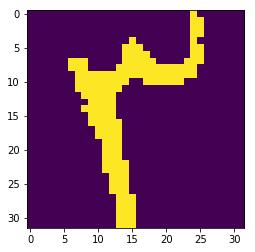

In [32]:
X = data_X['arr_0']
Y = data_Y['arr_0']
plt.imshow(X[12])
print('the shape of X is {}: '.format(X.shape))
print('the shape of Y is {}: '.format(Y.shape))



#Visualising data

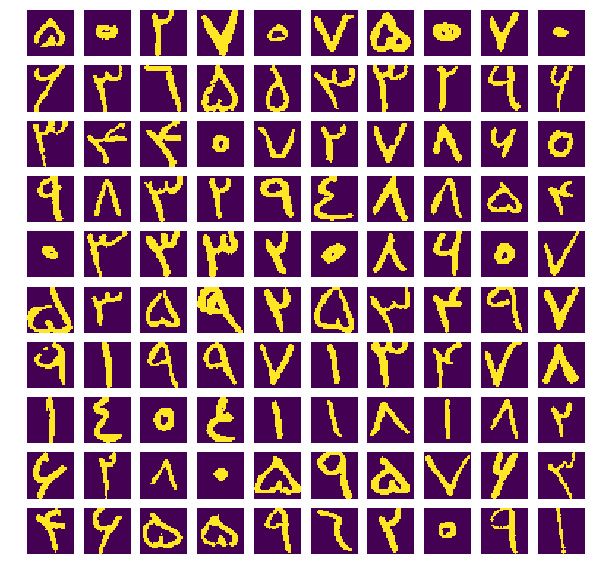

In [33]:
fig = plt.figure(figsize = (10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(X[i])
  ax.axis("off")
  
  

#Short about our data set
our data set is a collection of 32*32 pixel of persian hand writing digits

the number of digits is 102352 

#Implementing PCA method for feature reduction

In [34]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components)
X = X.reshape(-1,32*32)
pca.fit(X)
pca_X = pca.transform(X)
print('the shape of the original data is : {}'.format(X.shape))
print('the shape of the data after implementing PCA is : {}'.format(pca_X.shape))

the shape of the original data is : (102352, 1024)
the shape of the data after implementing PCA is : (102352, 10)


the shape of the pca_X_pic is : (102352, 1024)
the result with n_components = 10 is :


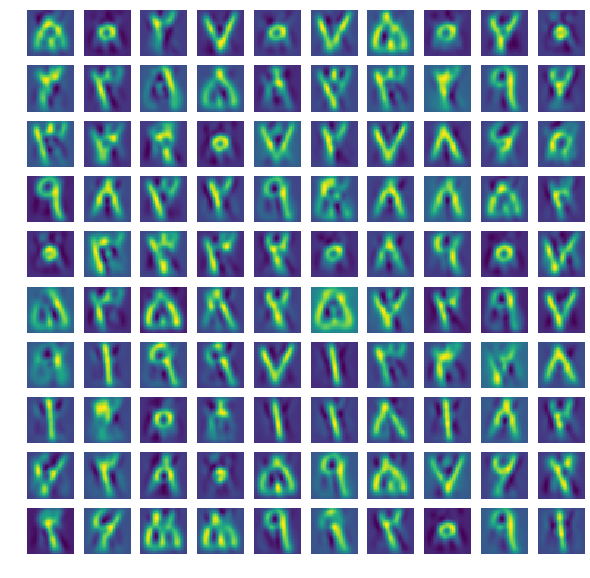

In [35]:
pca_X_pic = pca.inverse_transform(pca_X)
print('the shape of the pca_X_pic is : {}'.format(pca_X_pic.shape))
print('the result with n_components = {} is :'.format(n_components))
fig = plt.figure(figsize=(10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(pca_X_pic[i].reshape(32,32))
  ax.axis('off')
  

#Ploting the SCREE plot of the features
in this section I want to plot the importance of the pca features in a bar plot

the scree plot of the features is :


<BarContainer object of 32 artists>

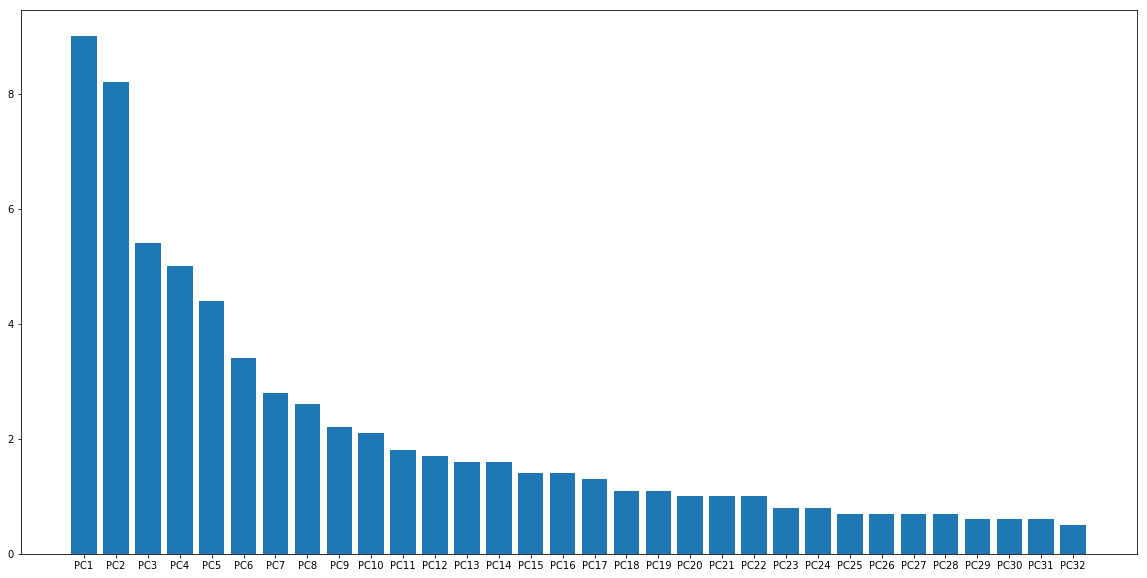

In [36]:
n=32
pca = PCA(n)
pca.fit(X)
data = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
print('the scree plot of the features is :')
ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

#Mian part of code
now we have both original data and 'PCA' ed data 


The Originial data is -----> **X**. Its shape is (n_s,32*32). We also have this data set as Images. i.e.** X_pic** which its shape is (n_s,32,32)

The 'PCA' ed data is ------> **pca_X**. Its shape is (n_s, n_com*n_com). **(((Note tata n_com is the numper of PCA components)))**.We also have 'PCA' ed data as image which is **pca_X_pic**

**now until end I will implement the algorithms on ORIGINAL data**

#Data preparation


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y)
print(Y_train.shape)

(76764,)


#Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
score = model.score(X_test, Y_test)
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: 0.699448917018949 


And some cool predictions:

[4.703128]


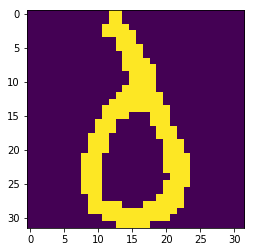

In [57]:
i=15
plt.imshow(X[i].reshape(32,32))
predict=model.predict(X[i].reshape(1,-1))
print(predict)

#Support Vector Machine Classifier

(1024,)
